> **Data Mining Programming Project**:
>
> - Konstantinos Konstantinidis AEM:2546 konkonstant@uth.gr
> - Nikolaos Stavrinos AEM:2631 nstavrinos@uth.gr

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install wordcloud
!pip install langdetect

# Import Libraries

In [2]:
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from collections import Counter

# Download all the lexicons needed

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tweeter Api

In [4]:
# Authentication
consumerKey = "xebmbbEHiMzamPFMBhoEkW8N8"
consumerSecret = "irADKXxRXLoDlWP90DulNUN9kVQr7pfICTQlPA4BRbhUu9PZTj"
accessToken = "3053418828-Kqwl2veNMbb9hpbJ2Zdax8tVm6V9zBfRTGtB7Bt"
accessTokenSecret = "q6ZYSCCPlwhOoxV2QBCSqjRT0GOS941qCQQMbJWoy5wuk"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Sentiment Analysis without data preprocessing
## Ask user for topic and word count input

In [5]:

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: data mining
Please enter how many tweets to analyze: 1000


# Number of Tweets (Total, Positive, Negative, Neutral)

In [6]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  124
negative number:  46
neutral number:  830


In [7]:
tweet_list

,0
0,RT @DocumentingBTC: The #Bitcoin mining firm A...
1,"RT @WholeMarsBlog: For the record, I like Bitc..."
2,@dietrich @withFND This what i am trying to un...
3,RT @DocumentingBTC: The #Bitcoin mining firm A...
4,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...
...,...
995,#DRC \n#DanGertler's mining deals could cause ...
996,RT @DocumentingBTC: The #Bitcoin mining firm A...
997,RT @DocumentingBTC: The #Bitcoin mining firm A...
998,RT @DocumentingBTC: The #Bitcoin mining firm A...


# PieChart of current data

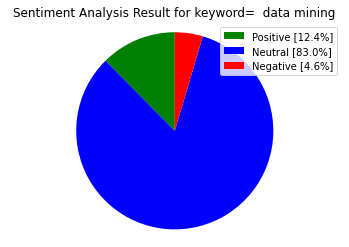

In [8]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

# Deleting duplicates 

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @DocumentingBTC: The #Bitcoin mining firm A...,RT @DocumentingBTC: The #Bitcoin mining firm A...
1,"RT @WholeMarsBlog: For the record, I like Bitc...","RT @WholeMarsBlog: For the record, I like Bitc..."
2,@dietrich @withFND This what i am trying to un...,@dietrich @withFND This what i am trying to un...
4,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...
5,RT @Indian10000000: According to data compiled...,RT @Indian10000000: According to data compiled...
...,...,...
987,Damn. This data mining final was all fun and g...,Damn. This data mining final was all fun and g...
989,Prestashop data mining ou comment prospecter v...,Prestashop data mining ou comment prospecter v...
991,Bitcoin Miner Argo Buys Two Hydro-Powered Data...,Bitcoin Miner Argo Buys Two Hydro-Powered Data...
993,#Automotive #Events Opportunity knocks: Exhibi...,#Automotive #Events Opportunity knocks: Exhibi...


# Cleaning Text (RT, URL ,Emoji etc)

In [11]:
#Removing RT, Url,Emojis etc
remove_rt = lambda x: re.sub(r'RT|\@\w+','', x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()

tw_list.head(10)

,0,text
0,RT @DocumentingBTC: The #Bitcoin mining firm A...,the bitcoin mining firm argo blockchain anno...
1,"RT @WholeMarsBlog: For the record, I like Bitc...",for the record i like bitcoin and i think th...
2,@dietrich @withFND This what i am trying to un...,this what i am trying to understand soan exa...
4,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...,this tesla bitcoin mining energy an unemotiona...
5,RT @Indian10000000: According to data compiled...,according to data compiled by keralabased ci...
7,@codingfess Pake data mining menggunakan metod...,pake data mining menggunakan metode apriori
9,RT @pittcowboy: The mayor needs to explain why...,the mayor needs to explain why he utilized d...
12,RT @danielsgoldman: For someone who spends a l...,for someone who spends a lot of time mining ...
16,RT @nic__carter: @elonmusk Why don't you actua...,why dont you actually investigate bitcoins ...
20,@MathematikerRuR @HuebnerJohannes Die „Studie“...,die studie gibts im netz ist halt reines dat...


# Removing Punctuation

In [12]:
def remove_punct(text):
    # Remove numbers
    text = re.sub('[0-9]+', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

tw_list['punct'] = tw_list["text"].apply(lambda x: remove_punct(x))

# Appliyng tokenization

In [13]:
def tokenization(text):
   
    text = word_tokenize(text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x))

# Removing stopwords

In [14]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

# Applying Stemmer

In [15]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

# Calculating Negative, Positive, Neutral and Compound values after processing

In [16]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,punct,tokenized,nonstop,stemmed,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @DocumentingBTC: The #Bitcoin mining firm A...,the bitcoin mining firm argo blockchain anno...,the bitcoin mining firm argo blockchain anno...,"[the, bitcoin, mining, firm, argo, blockchain,...","[bitcoin, mining, firm, argo, blockchain, anno...","[bitcoin, mine, firm, argo, blockchain, annouc...",-0.100000,0.512500,neutral,0.000,1.000,0.000,0.0000
1,"RT @WholeMarsBlog: For the record, I like Bitc...",for the record i like bitcoin and i think th...,for the record i like bitcoin and i think th...,"[for, the, record, i, like, bitcoin, and, i, t...","[record, like, bitcoin, think, environmental, ...","[record, like, bitcoin, think, environment, co...",0.500000,0.500000,positive,0.000,0.878,0.122,0.3612
2,@dietrich @withFND This what i am trying to un...,this what i am trying to understand soan exa...,this what i am trying to understand soan exa...,"[this, what, i, am, trying, to, understand, so...","[trying, understand, soan, example, asking, pe...","[tri, understand, soan, exampl, ask, peopl, us...",-0.291667,0.541667,negative,0.080,0.920,0.000,-0.1027
4,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...,this tesla bitcoin mining energy an unemotiona...,this tesla bitcoin mining energy an unemotiona...,"[this, tesla, bitcoin, mining, energy, an, une...","[tesla, bitcoin, mining, energy, unemotional, ...","[tesla, bitcoin, mine, energi, unemot, unbias,...",0.000000,0.000000,positive,0.090,0.738,0.172,0.2500
5,RT @Indian10000000: According to data compiled...,according to data compiled by keralabased ci...,according to data compiled by keralabased ci...,"[according, to, data, compiled, by, keralabase...","[according, data, compiled, keralabased, civil...","[accord, data, compil, keralabas, civil, engin...",0.000000,0.000000,positive,0.000,0.839,0.161,0.3612
7,@codingfess Pake data mining menggunakan metod...,pake data mining menggunakan metode apriori,pake data mining menggunakan metode apriori,"[pake, data, mining, menggunakan, metode, apri...","[pake, data, mining, menggunakan, metode, apri...","[pake, data, mine, menggunakan, metod, apriori]",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @pittcowboy: The mayor needs to explain why...,the mayor needs to explain why he utilized d...,the mayor needs to explain why he utilized d...,"[the, mayor, needs, to, explain, why, he, util...","[mayor, needs, explain, utilized, data, mining...","[mayor, need, explain, util, data, mine, softw...",0.016667,0.066667,neutral,0.000,1.000,0.000,0.0000
12,RT @danielsgoldman: For someone who spends a l...,for someone who spends a lot of time mining ...,for someone who spends a lot of time mining ...,"[for, someone, who, spends, a, lot, of, time, ...","[someone, spends, lot, time, mining, twitter, ...","[someon, spend, lot, time, mine, twitter, sile...",-0.500000,1.000000,negative,0.227,0.773,0.000,-0.6124
16,RT @nic__carter: @elonmusk Why don't you actua...,why dont you actually investigate bitcoins ...,why dont you actually investigate bitcoins ...,"[why, dont, you, actually, investigate, bitcoi...","[dont, actually, investigate, bitcoins, energy...","[dont, actual, investig, bitcoin, energi, mix,...",-0.083333,0.083333,positive,0.000,0.870,0.130,0.2732
20,@MathematikerRuR @HuebnerJohannes Die „Studie“...,die studie gibts im netz ist halt reines dat...,die studie gibts im netz ist halt reines dat...,"[die, studie, gibts, im, netz, ist, halt, rein...","[die, studie, gibts, im, netz, ist, halt, rein...","[die, studi, gibt, im, netz, ist, halt, rein, ...",0.000000,0.000000,negative,0.231,0.769,0.000,-0.5994


# Creating new data frames for all sentiments (positive, negative and neutral)


In [17]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

# Function to count values of sentiments

In [18]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [19]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,132,50.57
positive,92,35.25
negative,37,14.18


# Create Pie Chart for processed data

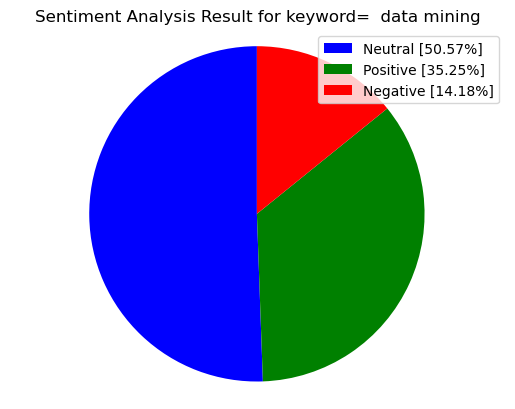

In [20]:
pichart = count_values_in_column(tw_list,"sentiment")
labels = [  'Neutral ['+str(pichart["Percentage"][0])+'%]','Positive ['+str(pichart["Percentage"][1])+'%]','Negative ['+str(pichart["Percentage"][2])+'%]']
sizes = pichart["Percentage"]
colors = [ 'blue','green','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

# Function to Create cloud of words

In [21]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=1000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    path="wc.png"
    display(Image.open(path))

### Creating wordcloud for all tweets


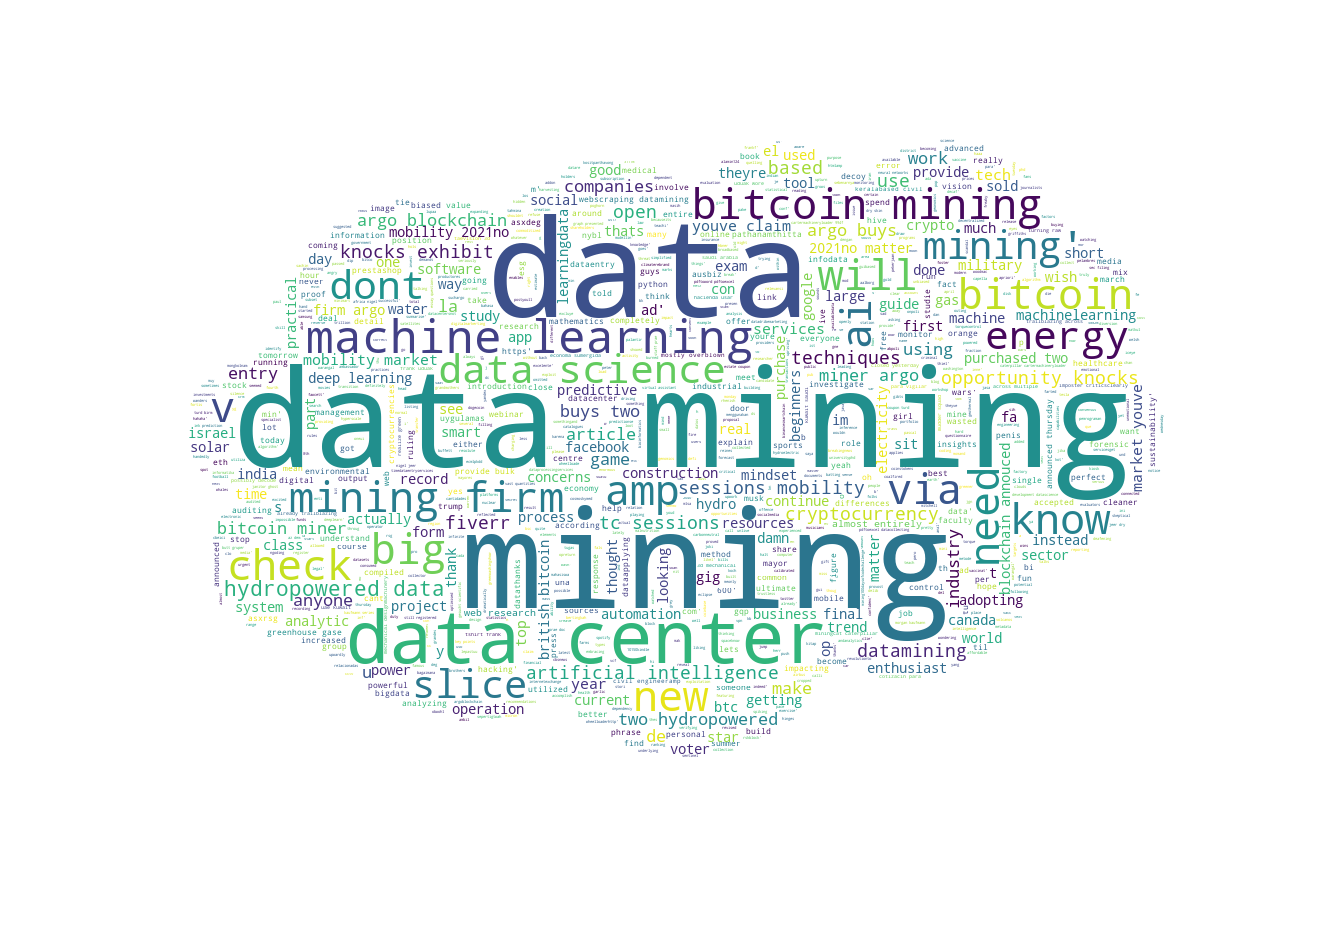

In [22]:
create_wordcloud(tw_list["text"].values)

### Creating wordcloud for positive sentiment

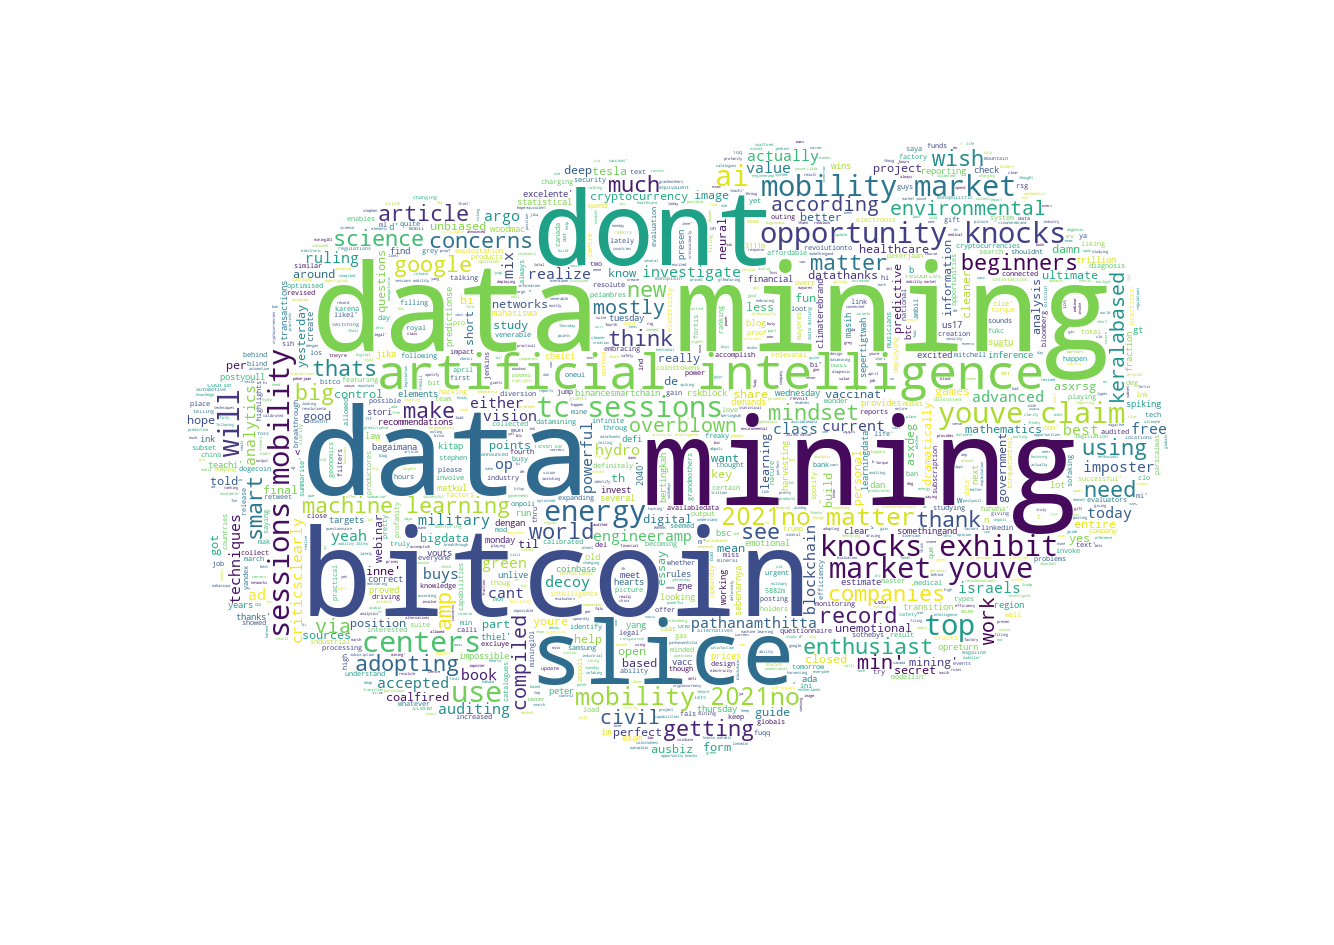

In [23]:
create_wordcloud(tw_list_positive["text"].values)

### Creating wordcloud for negative sentiment


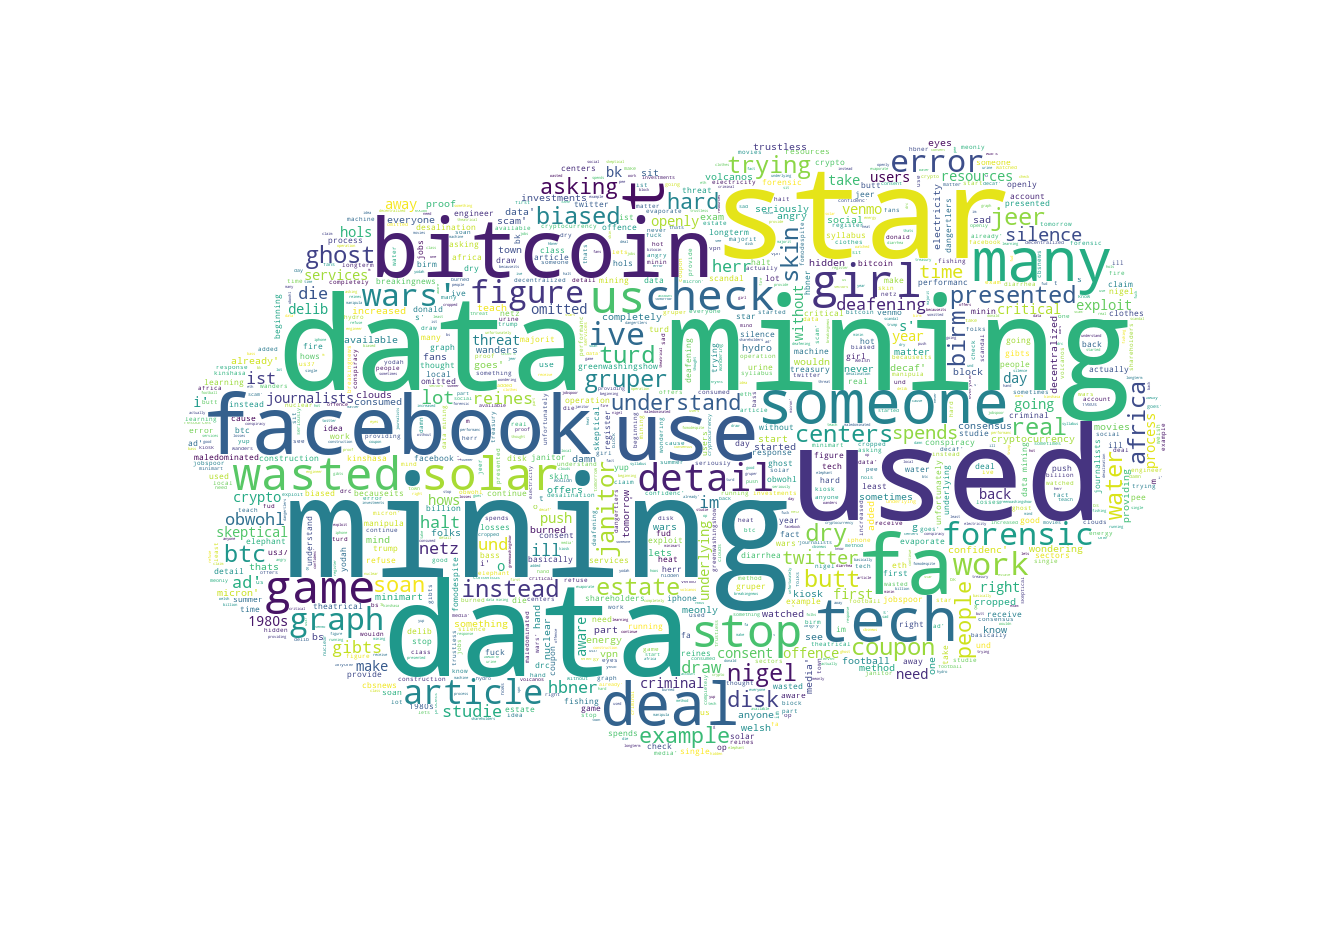

In [24]:
create_wordcloud(tw_list_negative["text"].values)

### Creating wordcloud for neutral sentiment

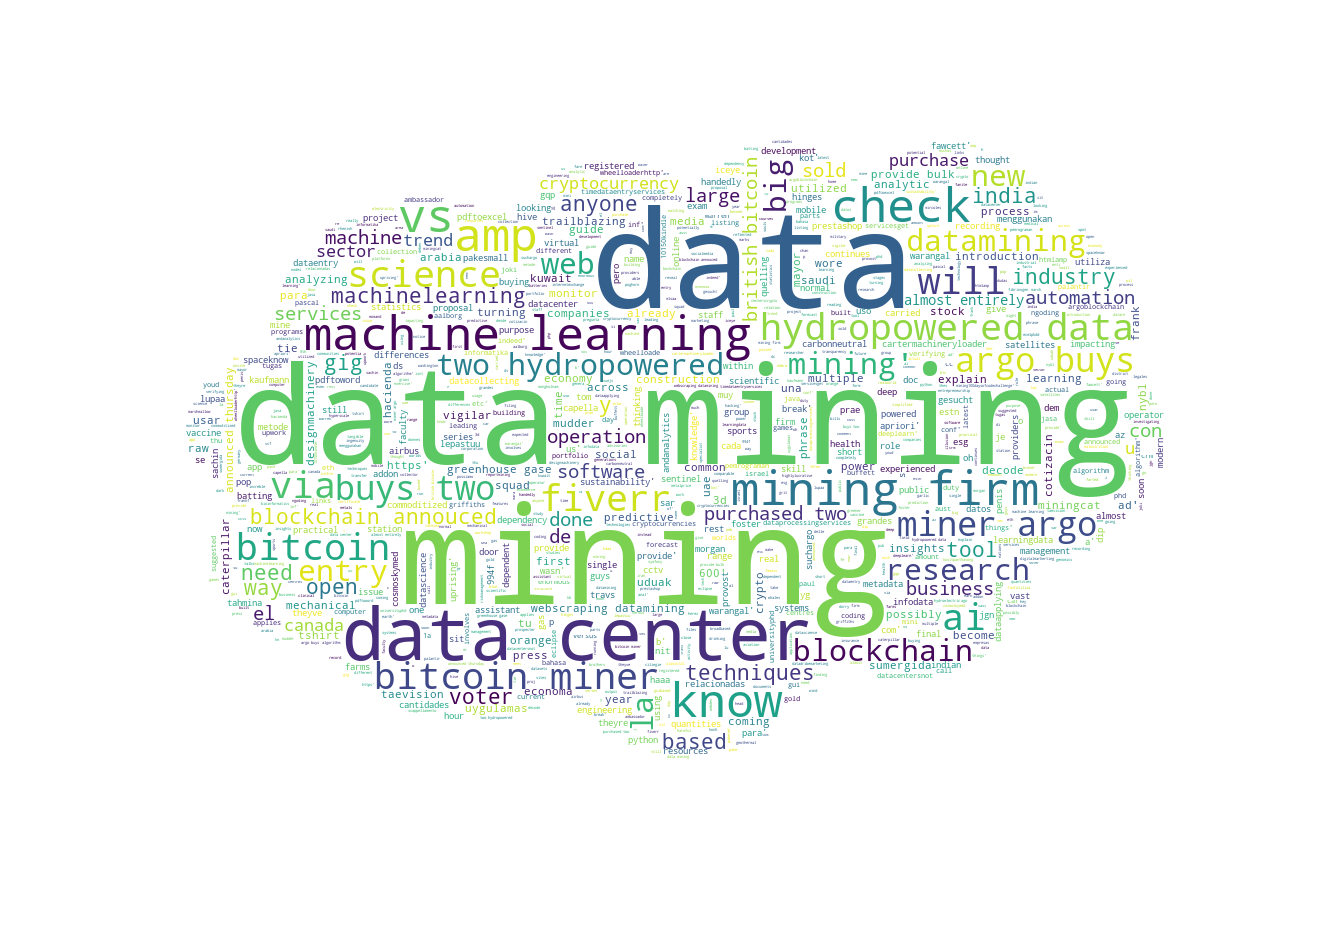

In [25]:
create_wordcloud(tw_list_neutral["text"].values)

## Calculating tweet's lenght and word count


In [26]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,92.32
neutral,80.92
positive,97.84


In [28]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.62
neutral,12.87
positive,16.16


In [29]:
tw_list.head()

,0,text,punct,tokenized,nonstop,stemmed,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,RT @DocumentingBTC: The #Bitcoin mining firm A...,the bitcoin mining firm argo blockchain anno...,the bitcoin mining firm argo blockchain anno...,"[the, bitcoin, mining, firm, argo, blockchain,...","[bitcoin, mining, firm, argo, blockchain, anno...","[bitcoin, mine, firm, argo, blockchain, annouc...",-0.100000,0.512500,neutral,0.00,1.000,0.000,0.0000,119,19
1,"RT @WholeMarsBlog: For the record, I like Bitc...",for the record i like bitcoin and i think th...,for the record i like bitcoin and i think th...,"[for, the, record, i, like, bitcoin, and, i, t...","[record, like, bitcoin, think, environmental, ...","[record, like, bitcoin, think, environment, co...",0.500000,0.500000,positive,0.00,0.878,0.122,0.3612,118,21
2,@dietrich @withFND This what i am trying to un...,this what i am trying to understand soan exa...,this what i am trying to understand soan exa...,"[this, what, i, am, trying, to, understand, so...","[trying, understand, soan, example, asking, pe...","[tri, understand, soan, exampl, ask, peopl, us...",-0.291667,0.541667,negative,0.08,0.920,0.000,-0.1027,96,18
4,THIS 👇\nTesla. Bitcoin. Mining. Energy. An Une...,this tesla bitcoin mining energy an unemotiona...,this tesla bitcoin mining energy an unemotiona...,"[this, tesla, bitcoin, mining, energy, an, une...","[tesla, bitcoin, mining, energy, unemotional, ...","[tesla, bitcoin, mine, energi, unemot, unbias,...",0.000000,0.000000,positive,0.09,0.738,0.172,0.2500,76,11
5,RT @Indian10000000: According to data compiled...,according to data compiled by keralabased ci...,according to data compiled by keralabased ci...,"[according, to, data, compiled, by, keralabase...","[according, data, compiled, keralabased, civil...","[accord, data, compil, keralabas, civil, engin...",0.000000,0.000000,positive,0.00,0.839,0.161,0.3612,113,14


# Machine Learning Analysis

In [30]:
#Analyzer for CuntVectorizer
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

#converting the sentiment values to 0,1,2 
y=tw_list['sentiment']
sentiment_ordering = ['positive', 'neutral', 'negative']
y = y.apply(lambda x: sentiment_ordering.index(x))

#vectorazing the text values
cv = CountVectorizer(analyzer=clean_text) 
X = cv.fit_transform(tw_list['text'])


#splittig the data set into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


#Naive Bayes Model
NB_model=MultinomialNB()
NB_model.fit(X_train,y_train)

y_pred_nb=NB_model.predict(X_test)

cf=classification_report(y_test,y_pred_nb)
print("NB",cf)


#Logistic Regression Model
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)

cf=classification_report(y_test, y_predict_lr)
print("LR",cf)


#SVM Model
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)
y_predict_svm = SVM_model.predict(X_test)

cf=classification_report(y_test,y_predict_svm)
print("SVM",cf)

NB               precision    recall  f1-score   support

           0       0.74      0.54      0.62        26
           1       0.68      0.93      0.78        41
           2       0.50      0.17      0.25        12

    accuracy                           0.68        79
   macro avg       0.64      0.54      0.55        79
weighted avg       0.67      0.68      0.65        79

LR               precision    recall  f1-score   support

           0       1.00      0.58      0.73        26
           1       0.63      0.98      0.77        41
           2       0.00      0.00      0.00        12

    accuracy                           0.70        79
   macro avg       0.54      0.52      0.50        79
weighted avg       0.66      0.70      0.64        79

SVM               precision    recall  f1-score   support

           0       0.88      0.58      0.70        26
           1       0.65      0.98      0.78        41
           2       0.00      0.00      0.00        12

    accura

/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Most Used Words

## Horizontal chart for word count

In [31]:
def ybarchart(n_trigrams):
    labels = []
    values = []


    for a_tuple in n_trigrams:

        labels.append(a_tuple[0])
        values.append(a_tuple[1])

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(x - width/2, values, width)

    ax.set_ylabel('Words')
    ax.set_title('Common Words Found in Tweets (Without Stop or Collection Words)')
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    

    fig.tight_layout()

    plt.show()

## Function to find word correlation in same tweet

In [32]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

## 1 word correlation

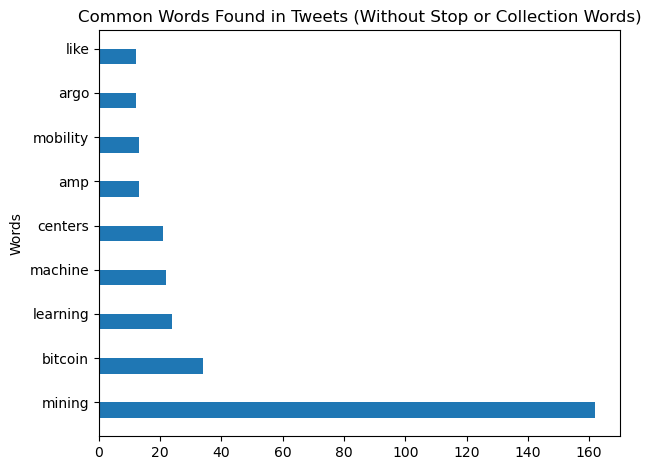

[('mining', 162),
 ('bitcoin', 34),
 ('learning', 24),
 ('machine', 22),
 ('centers', 21),
 ('amp', 13),
 ('mobility', 13),
 ('argo', 12),
 ('like', 12)]

In [33]:
countdf = get_top_n_gram(tw_list['text'],(1,1),10)
ybarchart(countdf[1:11])
countdf[1:11]

## 2 word correlation

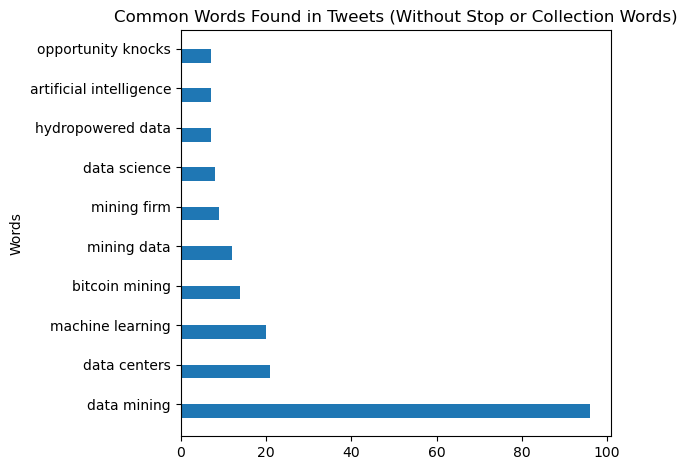

[('data mining', 96),
 ('data centers', 21),
 ('machine learning', 20),
 ('bitcoin mining', 14),
 ('mining data', 12),
 ('mining firm', 9),
 ('data science', 8),
 ('hydropowered data', 7),
 ('artificial intelligence', 7),
 ('opportunity knocks', 7)]

In [34]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),10)
ybarchart(n2_bigrams)
n2_bigrams

## 3 word correlation

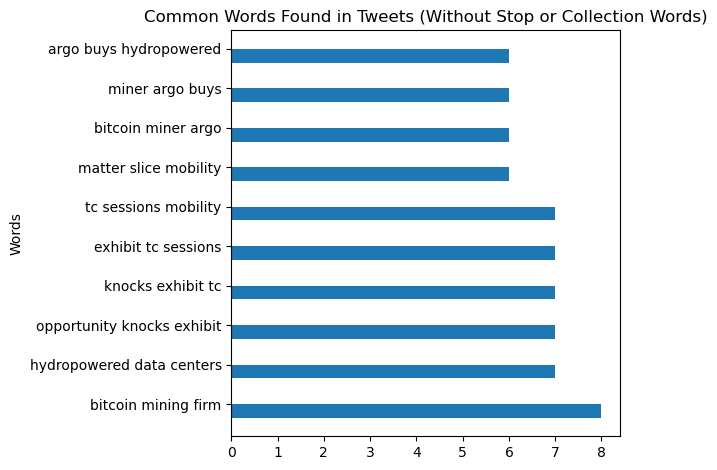

[('bitcoin mining firm', 8),
 ('hydropowered data centers', 7),
 ('opportunity knocks exhibit', 7),
 ('knocks exhibit tc', 7),
 ('exhibit tc sessions', 7),
 ('tc sessions mobility', 7),
 ('matter slice mobility', 6),
 ('bitcoin miner argo', 6),
 ('miner argo buys', 6),
 ('argo buys hydropowered', 6)]

In [35]:
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),10)
ybarchart(n3_trigrams)
n3_trigrams

# Search a specific word in the tweets and with what other words it is used

In [36]:
search_word = input("Please enter a word to search within the tweets: ")
count_search = Counter()

for  tweet in tw_list['nonstop']:
    terms_only = [term for term in tweet]
    
    if search_word in terms_only:
        count_search.update(terms_only)
print("Co-occurrence for %s:" % search_word)
print(count_search.most_common(10))

Please enter a word to search within the tweets: machine
Co-occurrence for machine:
[('data', 26), ('learning', 24), ('machine', 22), ('mining', 17), ('vs', 8), ('science', 7), ('amp', 4), ('ai', 4), ('deep', 4), ('techniques', 4)]
